In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

## Análise exploratória do dataset base de hapiness score

# Objetivo: 

A partir de um dataset de hapiness score, obtido a partir de perguntas feitas à população, será construído, nesse projeto, uma regressão para ter uma fórmula que meça o hapiness score, com base em  dados concretos.

No database que foi pego como base da pesquisa, tínhamos o happiness score definido a partir de perguntas para a população que dava um número de 0 a 10, e com base nisso, eles colocaram o quanto que cada variável contribuiu para essa resposta do país. Com isso, estamos fazendo uma modelagem para prever a partir de regressões, o happiness score com dados prévios, sem ter a necessidade de perguntar para as pessoas.

In [3]:
#Função que realiza a regressão
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [4]:
dataset = pd.read_csv('hapiness_score_2015.csv')
dataset.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Podemos comparar o nosso resultado com a pesquisa feita nesse dataset, para ver se faz sentido

In [5]:
#Colocando os países como o index
h = dataset.loc[:,]
data_idx=h.set_index("Country")

## Primeira variável analisada: GDP

In [6]:
#Leitura do Excel (Divisão do ano feito anteriormente no arquivo de python GDP - 2015)
gdp = pd.read_excel('GDP_lido.xlsx')
gdp.head()

#Colocando o index como os Países
i = gdp.loc[:,]
gdp_idx = i.set_index('País')
gdp_idx.head()

,GDP em 2015
País,
Afghanistan,2.11
Albania,3.82
Algeria,2.10
Andorra,0.00
Angola,2.46


In [7]:
# Junção do dataset com o GDP 
df = gdp_idx.join(data_idx, how='inner')

ter = df.loc[:,['GDP em 2015', 'Happiness Score']]

ter.head()

,GDP em 2015,Happiness Score
Afghanistan,2.110,3.575
Albania,3.820,4.959
Algeria,2.100,5.605
Angola,2.460,4.033
Argentina,-0.128,6.574


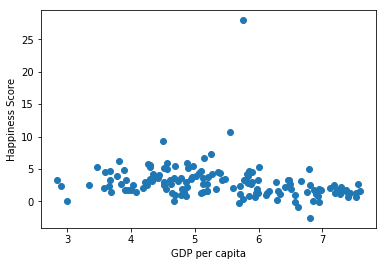

In [8]:
#Plotagem do gráfico de dispersão
plt.scatter(ter["Happiness Score"],ter["GDP em 2015"]);
plt.xlabel("GDP per capita");
plt.ylabel("Happiness Score");
plt.show()

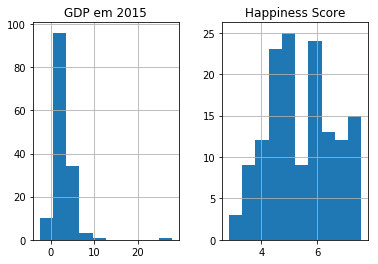

In [9]:
ter.hist();

In [10]:
ter.corr()

,GDP em 2015,Happiness Score
GDP em 2015,1.00000,-0.22057
Happiness Score,-0.22057,1.00000


No histograma do GDP, percebemos que o gráfico está com uma concentração na parte esquerda, com um outlier na direita, que possivelmente atrapalha o histograma ser representado como uma normal assim como o cálculo da correlação, deixando ele com o valor de 22%

In [11]:
xc = sm.add_constant(ter["Happiness Score"]) #serve para incluir um beta zero, que é uma constante inicial
model = sm.OLS(ter['Happiness Score'],ter["GDP em 2015"]) 
results = model.fit() #gera o relatório com os dados calculados.
results.summary() #colocar o nome das coisas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           5.12e-21
Time:                        18:14:20   Log-Likelihood:                -408.93
No. Observations:                 145   AIC:                             819.9
Df Residuals:                     144   BIC:                             822.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GDP em 2015     0.9249      0.083     11.079      0.000       0.760       1.090
==============================================================================
Omnibus:                      125.460   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2438.662
Skew:                          -2.840   Prob(JB):                         0.00
Kurtosis:                      22.271   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como o r-square indica o quão o modelo é bom para prever algo a partir dele, o nosso é razoável pois tem 46% de probabilidade de prever algo. 

O p-value do modelo é bastante baixo indicando que as variáveis x e y são correlacionadas, indicando heterocedasticidade.

A estatistica de teste f indica que os betas são reais, diferentes de zero  visto que suas probabilidades deles serem zero é muito baixa.

Além disso o teste Omnibus indica que há baixa probabilidade das variáveis se distribuirem sendo uma normal.


## Segunda variável analisada: Expectativa de vida


In [12]:
# Leitura dos dados sobre expectativa de vida
exp = pd.read_excel('expecativa.xlsx')

#Separando a coluna do ano de 2015
exp_2015 = exp.loc[:,['Life expectancy', 2015]]
exp_better_2015 = exp_2015.dropna()
expp = exp_better_2015.rename(columns={2015:'Expectativa de vida'})

#Colocando o index como os países
exp_idx = expp.set_index('Life expectancy')

#Juntando a nova variável com o dataframe 
dff = ter.join(exp_idx, how='inner')
dff.head()
dff.to_excel('dff.xlsx')

,GDP em 2015,Happiness Score,Expectativa de vida
GDP em 2015,1.000000,-0.220570,-0.227385
Happiness Score,-0.220570,1.000000,0.737686
Expectativa de vida,-0.227385,0.737686,1.000000


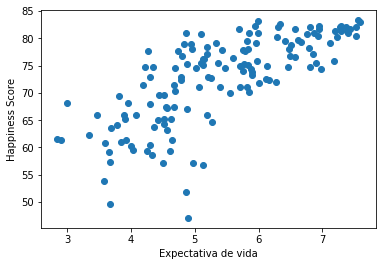

In [13]:
plt.scatter(dff["Happiness Score"],dff["Expectativa de vida"]);
plt.xlabel("Expectativa de vida");
plt.ylabel("Happiness Score");

dff.corr()

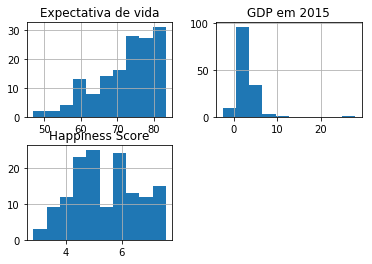

In [14]:
dff.hist();

In [15]:
x = dff[['Expectativa de vida']]
y = dff[['Happiness Score']]

results = regress(x, y)
results.summary() #coloar o nome das coisas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     170.7
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           3.60e-26
Time:                        18:14:26   Log-Likelihood:                -171.30
No. Observations:                 145   AIC:                             346.6
Df Residuals:                     143   BIC:                             352.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.3091      0.594     -3.889      0.000      -3.483      -1.135
Expectativa de vida     0.1064      0.008     13.066      0.000       0.090       0.122
==============================================================================
Omnibus:                        2.776   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                1.873
Skew:                           0.004   Prob(JB):                        0.392
Kurtosis:                       2.443   Cond. No.                         657.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Já na regressão linear entre expectativa de vida e happiness score, temos que o modelo tem uma confiabilidade de 54%, além disso, a probabilidade de f é bastante baixa, de modo a indicar que os betas são reias não nulos. E a probabilidade dos coeficientes não serem correlacionados é baixa também, visto que a probabilidade de t quebra a hipótese nula.

In [16]:
X3 = dff[["GDP em 2015","Expectativa de vida"]]
results3 = regress(X3, dff["Happiness Score"])
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     85.78
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           3.75e-25
Time:                        18:14:26   Log-Likelihood:                -170.83
No. Observations:                 145   AIC:                             347.7
Df Residuals:                     142   BIC:                             356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1079      0.630     -3.347      0.001      -3.353      -0.863
GDP em 2015            -0.0234      0.024     -0.961      0.338      -0.071       0.025
Expectativa de vida     0.1045      0.008     12.502      0.000       0.088       0.121
==============================================================================
Omnibus:                        2.939   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                1.946
Skew:                          -0.020   Prob(JB):                        0.378
Kurtosis:                       2.434   Cond. No.                         697.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Juntando as duas variáveis, percebemos que a confiabilidade é de 54%, além de que a probabilidade de F-statistic é muito baixa, afirmando que pelo menos um dos betas é diferente de zero. Porém, ao observar o p-value de cada uma das variáveis, percebemos que essa probabilidade é baixa em relação ao beta do 'Happiness Score' e da 'Expectativa de vida' são muito baixos, quebrando a hipótese nula de que o beta é igual à zero. Mas para o p-value do 'GDP em 2015', não é possível afirmar nada, considerando que o p-value não é um valor baixo.

Em relação aos resíduos, pelo método de Omnibus, a probabilidade de se comportar como uma normal é de 23%, já para o método de Jarque-Bera, apresenta uma probabilidade de 37% de se comportar como uma normal.

## Análise exploratória sem outlier do GDP 

In [17]:
gdp1 = pd.read_excel('GDP_outlier.xlsx')

i = gdp1.loc[:,]
gdp1_idx = i.set_index('País')

In [18]:
dff2_ = dff.drop("GDP em 2015", axis=1) #Tirando a coluna do GDP com outlier
dff2 = dff2_.join(gdp1_idx, how='inner') #Colocando a coluna sem o outlier

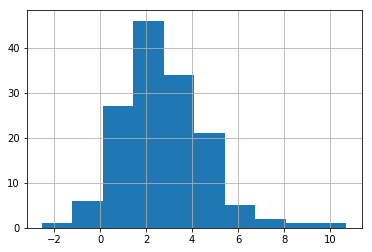

In [19]:
dff2['GDP em 2015'].hist();

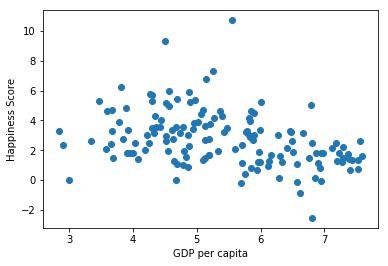

In [20]:
plt.scatter(dff2["Happiness Score"],dff2["GDP em 2015"]);
plt.xlabel("GDP per capita");
plt.ylabel("Happiness Score");
plt.show()

In [21]:
dff2.corr()

,Happiness Score,Expectativa de vida,GDP em 2015
Happiness Score,1.000000,0.737605,-0.360132
Expectativa de vida,0.737605,1.000000,-0.360598
GDP em 2015,-0.360132,-0.360598,1.000000


Como podemos observar, a correlação entre 'GDP em 2015'  e 'Happiness Score' aumentou para 36% de correlação, além do histograma ficar mais próximo de uma normal

In [22]:
x = dff2[['Expectativa de vida','GDP em 2015']]
y = dff2[['Happiness Score']]

results = regress(x,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     87.66
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.82e-25
Time:                        18:14:27   Log-Likelihood:                -168.96
No. Observations:                 144   AIC:                             343.9
Df Residuals:                     141   BIC:                             352.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7111      0.678     -2.523      0.013      -3.052      -0.370
Expectativa de vida     0.1007      0.009     11.589      0.000       0.084       0.118
GDP em 2015            -0.0683      0.038     -1.795      0.075      -0.143       0.007
==============================================================================
Omnibus:                        2.090   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.352   Jarque-Bera (JB):                1.574
Skew:                          -0.032   Prob(JB):                        0.455
Kurtosis:                       2.492   Cond. No.                         752.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sem o outlier do GDP, o r quadrado aumentou discretamente, a hipótese nula do F-statistic continua sendo rejeitada.

Sobre os p-values:
* Happiness Score: Aumentou em relação à outra anàlise, porém não o suficiente para não rejeitar a hipótese nula
* Expectativa de vida: O seu valor continua baixo, continuando a rejeitar a hipótese nula
* GDP em 2015: Seu valor abaixou, porém não o suficiente para rejeitar a hipótese nula, então, ainda não conseguimos afirmar nada 

## Terceira variável analisada: Corrupção

In [23]:
corrup = pd.read_excel('corrup_limpo.xlsx') #leitura do dataset

corrup1=corrup.set_index("Países")
dff3 = dff2.join(corrup1, how='inner') #junção com o dataframe já feito
dff3=dff3.rename(columns={'2015':"Corrupção 2015"})
dff3.head()

,Happiness Score,Expectativa de vida,GDP em 2015,Corrupção 2015
Afghanistan,3.575,53.8,2.110,11
Albania,4.959,78.0,3.820,36
Algeria,5.605,76.4,2.100,36
Angola,4.033,59.6,2.460,15
Argentina,6.574,76.5,-0.128,32


,Happiness Score,Expectativa de vida,GDP em 2015,Corrupção 2015
Happiness Score,1.000000,0.737605,-0.360132,0.680788
Expectativa de vida,0.737605,1.000000,-0.360598,0.646031
GDP em 2015,-0.360132,-0.360598,1.000000,-0.293008
Corrupção 2015,0.680788,0.646031,-0.293008,1.000000


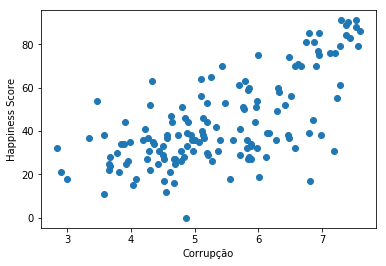

In [24]:
plt.scatter(dff3["Happiness Score"],dff3["Corrupção 2015"]);
plt.xlabel("Corrupção");

plt.ylabel("Happiness Score");

dff3.corr()

In [25]:
x = dff3[['Expectativa de vida', 'GDP em 2015', 'Corrupção 2015']]
y = dff3[['Happiness Score']]

resultado = regress(x,y)

resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     76.75
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           2.05e-29
Time:                        18:14:28   Log-Likelihood:                -157.12
No. Observations:                 144   AIC:                             322.2
Df Residuals:                     140   BIC:                             334.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3933      0.680     -0.578      0.564      -1.738       0.951
Expectativa de vida     0.0701      0.010      6.942      0.000       0.050       0.090
GDP em 2015            -0.0534      0.035     -1.513      0.132      -0.123       0.016
Corrupção 2015          0.0196      0.004      5.003      0.000       0.012       0.027
==============================================================================
Omnibus:                        0.850   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.896
Skew:                           0.051   Prob(JB):                        0.639
Kurtosis:                       2.627   Cond. No.                         964.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Com a implementação da variável corrupção, a confiabilidade do resultado aumentou para 62% e a hipótese nula do F-statistic continua sendo quebrada

Os p-values tiveram algumas mudanças também:

* Happiness Score: a probabilidade aumentou significamente, logo não podemos mais quebrar a hipótese nula com relação à essa variável
* Expectativa de Vida: Continua quebrando a hipótese nula, devido ao baixo valor de p-value
* GDP em 2015: Seu valor aumentou, e ainda nada se pode afirmar sobre o Beta
* Corrupção 2015: Como seu p-value apresenta um valor muito baixo se recusa a hipótese nula de que seu beta é igual à zero

Em relação a normalidade dos resíduos a partir dos testes Omnibus e JB, também aumentaram significamente, sendo a probabilidade de se comprtarem como curvas normais é de 65% para Omnibus e 63% para JB


#### Gráficos:

In [26]:
# plt.scatter(df_16["Happiness Score"],df_16["Expectativa de vida em 2016"]);
# plt.xlabel("Happiness Score");
# plt.ylabel("Expectativa de vida");


In [27]:
# plt.scatter(df_16["Happiness Score"],df_16["Corrupção 2016"]);
# plt.xlabel("Happiness Score");
# plt.ylabel("Corrupção");

In [28]:
# plt.scatter(df_16["Happiness Score"],df_16["GDP em 2016"]);
# plt.xlabel("Happiness Score");
# plt.ylabel("GDP");

## Outras variáveis analisadas: Inflação e Mortalidade

In [29]:
infla = pd.read_excel('infla_limpo.xlsx')
infla1=infla.set_index("Country Name")

dff4 = dff3.join(infla1, how='inner')
dff4=dff4.rename(columns={'2015':"Inflação 2015"})

,Happiness Score,Expectativa de vida,GDP em 2015,Corrupção 2015,Inflação 2015
Happiness Score,1.000000,0.756378,-0.406858,0.699055,-0.151930
Expectativa de vida,0.756378,1.000000,-0.416977,0.639818,-0.195925
GDP em 2015,-0.406858,-0.416977,1.000000,-0.400013,0.097465
Corrupção 2015,0.699055,0.639818,-0.400013,1.000000,-0.146056
Inflação 2015,-0.151930,-0.195925,0.097465,-0.146056,1.000000


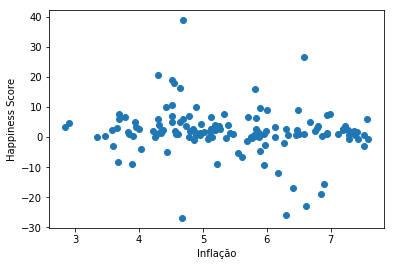

In [30]:
plt.scatter(dff4["Happiness Score"],dff4["Inflação 2015"]);
plt.xlabel("Inflação");
plt.ylabel("Happiness Score");

dff4.corr()

In [31]:
mort = pd.read_excel('mortalidade_limpo.xlsx')
mort1=mort.set_index("geo.name")

dff5 = dff4.join(mort1, how='inner')
dff5=dff5.rename(columns={2015:"Mortalidade 2015"})
dff5.head()

,Happiness Score,Expectativa de vida,GDP em 2015,Corrupção 2015,Inflação 2015,Mortalidade 2015
Afghanistan,3.575,53.8,2.110,11,2.432017,73.2
Albania,4.959,78.0,3.820,36,0.563993,14.0
Algeria,5.605,76.4,2.100,36,-6.571977,25.5
Angola,4.033,59.6,2.460,15,-3.980898,86.5
Argentina,6.574,76.5,-0.128,32,26.579992,11.6


,Happiness Score,Expectativa de vida,GDP em 2015,Corrupção 2015,Inflação 2015,Mortalidade 2015
Happiness Score,1.000000,0.756378,-0.406858,0.699055,-0.151930,-0.691654
Expectativa de vida,0.756378,1.000000,-0.416977,0.639818,-0.195925,-0.892395
GDP em 2015,-0.406858,-0.416977,1.000000,-0.400013,0.097465,0.369698
Corrupção 2015,0.699055,0.639818,-0.400013,1.000000,-0.146056,-0.580697
Inflação 2015,-0.151930,-0.195925,0.097465,-0.146056,1.000000,0.123736
Mortalidade 2015,-0.691654,-0.892395,0.369698,-0.580697,0.123736,1.000000


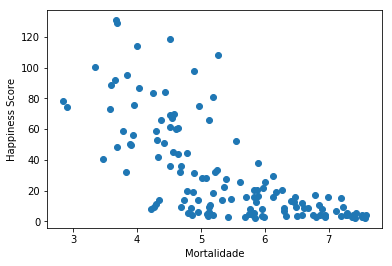

In [32]:
plt.scatter(dff5["Happiness Score"],dff5["Mortalidade 2015"]);
plt.xlabel("Mortalidade");
plt.ylabel("Happiness Score");

dff5.corr()

In [33]:
x = dff5[['Expectativa de vida','GDP em 2015', 'Corrupção 2015', 'Inflação 2015', 'Mortalidade 2015']]
y = dff5['Happiness Score']

results = regress(x, y)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     49.07
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           2.54e-28
Time:                        18:14:31   Log-Likelihood:                -141.95
No. Observations:                 136   AIC:                             295.9
Df Residuals:                     130   BIC:                             313.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0323      1.396     -0.023      0.982      -2.795       2.730
Expectativa de vida     0.0650      0.018      3.633      0.000       0.030       0.100
GDP em 2015            -0.0349      0.037     -0.939      0.349      -0.108       0.039
Corrupção 2015          0.0203      0.004      5.125      0.000       0.012       0.028
Inflação 2015           0.0002      0.008      0.020      0.984      -0.015       0.016
Mortalidade 2015       -0.0024      0.004     -0.568      0.571      -0.011       0.006
==============================================================================
Omnibus:                        1.151   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                1.061
Skew:                          -0.009   Prob(JB):                        0.588
Kurtosis:                       2.568   Cond. No.                     2.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Com a implementação dessas duas novas variáveis a confiabilidade do modelo aumentou para 64%, com a probabilidade de F-statistic ainda sendo baixa e assim rejeitando sua hipótese nula.

Sobre os p-values:
* Happiness Score: Aumentou significamente, e ainda não podemos afirmar nada sobre seu Beta
* Expectativa de Vida: Seu valor continua baixo, ainda rejeitando a hipótese nula
* GDP em 2015: Sua probabilidade também aumentou, não conseguindo quebrar a hipótese nula
* Corrupção 2015: Sua probabilidade continua sendo baixa, rejeitando a hipótese nula
* Inflação 2015: Seu valor é muito alto, não rejeitando a hipótese nula e nada se pode afirmar em relação ao seu beta
* Mortalidade 2015: Seu valor também é alto, não rejeitando a hipótese nula

Os resíduos também se aparentam em ser representados por uma curva normal devido ao valor alto da probabilidade do teste Omnibus e JB

## Análise em 2016 (vai ser usado como teste)

In [34]:
dataset = pd.read_csv('hapiness_score_2016.csv')

dataset_idx = dataset.set_index('Country')

df_16i = dataset_idx.loc[:,['Happiness Score']]
df_16i.head()

,Happiness Score
Country,
Denmark,7.526
Switzerland,7.509
Iceland,7.501
Norway,7.498
Finland,7.413


In [35]:
GDP = pd.read_excel('gdp_per_capita_yearly_growth.xlsx')

GDP1 = GDP.rename(columns={'geo':'País'})

GDP_idx = GDP1.set_index('País')

GDP1 = GDP_idx.loc[:, [2016]]

GDP_16 = GDP1.rename(columns={2016:'GDP em 2016'})

GDP_16.head()

,GDP em 2016
País,
Afghanistan,2.68
Albania,4.72
Algeria,2.36
Andorra,0.00
Angola,2.77


In [36]:
corrup = pd.read_excel('corruption_perception.xlsx')

corrup_idx = corrup.set_index('geo')

corrup1 = corrup_idx.loc[:, [2016]]

corrup_n = corrup1.dropna()

corrup_16 = corrup_n.rename(columns={'geo': "Países",2016:'Corrupção 2016'})

corrup_16.head()

,Corrupção 2016
geo,
Afghanistan,15
Albania,39
Algeria,34
Angola,18
Argentina,36


In [37]:
expectativa = pd.read_excel('expecativa.xlsx')

expec_idx = expectativa.set_index('Life expectancy')

expec1 = expec_idx.loc[:, [2016]]

expec_n = expec1.dropna()

expec_16 = expec_n.rename(columns={2016:'Expectativa de vida em 2016'})

expec_16.head()

,Expectativa de vida em 2016
Life expectancy,
Afghanistan,52.72
Albania,78.10
Algeria,76.50
American Samoa,73.00
Andorra,84.80


In [38]:
infla = pd.read_excel('infla.xls')

infla_idx = infla.set_index('Country Name')

infla1 = infla_idx.loc[:, ['2016']]

infla_n = infla1.dropna()

infla_16 = infla_n.rename(columns={'2016':'Inflação em 2016'})

infla_16.head()

,Inflação em 2016
Country Name,
Afghanistan,5.123375
Angola,27.674838
Albania,-0.481403
Andorra,0.699897
Arab World,0.485181


In [39]:
df_16_1 = df_16i.join(corrup_16, how='inner')
df_16_2 = df_16_1.join(expec_16, how='inner')
df_16_3 = df_16_2.join(GDP_16, how='inner')
df_16 = df_16_3.join(infla_16, how='inner')


df_16.head()

,Happiness Score,Corrupção 2016,Expectativa de vida em 2016,GDP em 2016,Inflação em 2016
Denmark,7.526,90,80.5,1.340,-0.046444
Switzerland,7.509,86,83.1,1.400,-0.566144
Iceland,7.501,78,83.3,2.480,2.113045
Norway,7.498,85,82.0,0.861,-1.114070
Finland,7.413,89,80.9,1.130,0.790899


## Teste com machine learning

In [45]:
X = dff5[[ "Expectativa de vida","GDP em 2015","Corrupção 2015","Inflação 2015"]]

y = dff5[['Happiness Score']]



In [46]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_SEED)
X_train = dff5[[ "Expectativa de vida","GDP em 2015","Corrupção 2015","Inflação 2015"]]
X_test = df_16[["Corrupção 2016","Expectativa de vida em 2016","GDP em 2016","Inflação em 2016"]]
y_train = dff5[['Happiness Score']]
y_test = df_16[['Happiness Score']]

In [47]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((136, 4), (136, 1), (134, 4), (134, 1))

In [49]:
# from sklearn.linear_model import LogisticRegression
# from sklearn import preprocessing
# from sklearn import utils
# from sklearn.metrics import accuracy_score

#lab_enc = preprocessing.LabelEncoder()
#training_scores_encoded = lab_enc.fit_transform(X_train)

# model = LogisticRegression()
# model.fit(y_train, X_train)

# y_pred = model.predict(X_test)
#print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

# não mantém a coluna de países daí acho que o tamanho entre eles não fica equivalente, 
#não sei muito bem o porquê ele não mantém mas acho que é esse o problema. mas mesmo assim, acho que podemos ver com a kelly, 
#deve ser por isso que quando compara um é boleano e o outro é contínuo --> temos também que dar uma olhadinha nesse resultado 
#no previsto pq só está dando ou 70 ou 36, deve ter algo de errado com o modelo ou com as variáveis, não sei. 

# y_pred

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
poly.fit_transform(X)


ValueError: bad input shape (136, 4)